In [1]:
import pandas as pd
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

In [2]:
data=pd.read_csv('formatted_flights.csv')

In [3]:
data.head(10)

,Unnamed: 0,arr_delay,name
0,0,11.0,United Air Lines Inc.
1,1,20.0,United Air Lines Inc.
2,2,33.0,American Airlines Inc.
3,3,-18.0,JetBlue Airways
4,4,-25.0,Delta Air Lines Inc.
5,5,12.0,United Air Lines Inc.
6,6,19.0,JetBlue Airways
7,7,-14.0,ExpressJet Airlines Inc.
8,8,-8.0,JetBlue Airways
9,9,8.0,American Airlines Inc.


In [4]:
del data['Unnamed: 0']

In [5]:
data.head(10)

,arr_delay,name
0,11.0,United Air Lines Inc.
1,20.0,United Air Lines Inc.
2,33.0,American Airlines Inc.
3,-18.0,JetBlue Airways
4,-25.0,Delta Air Lines Inc.
5,12.0,United Air Lines Inc.
6,19.0,JetBlue Airways
7,-14.0,ExpressJet Airlines Inc.
8,-8.0,JetBlue Airways
9,8.0,American Airlines Inc.


In [7]:
data.shape

(317113, 2)

In [8]:
data.max()

arr_delay               120
name         Virgin America
dtype: object

In [9]:
s=data['arr_delay']

In [10]:
max(s)

120.0

Text(0, 0.5, 'Flights')

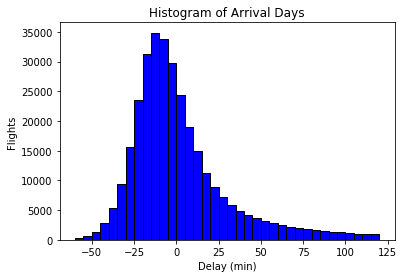

In [11]:
plt.hist(data['arr_delay'],color='blue',edgecolor='black',bins=int(180/5))
plt.title('Histogram of Arrival Days')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')

Text(0, 0.5, 'Flights')

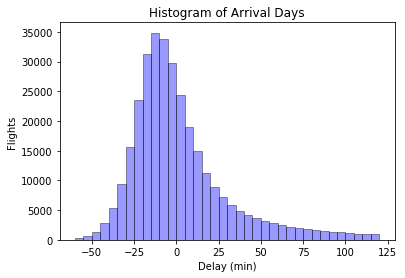

In [12]:
sns.distplot(data['arr_delay'],hist=True,kde=False,bins=int(180/5),color='blue',hist_kws={'edgecolor':'black'})
plt.title('Histogram of Arrival Days')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')

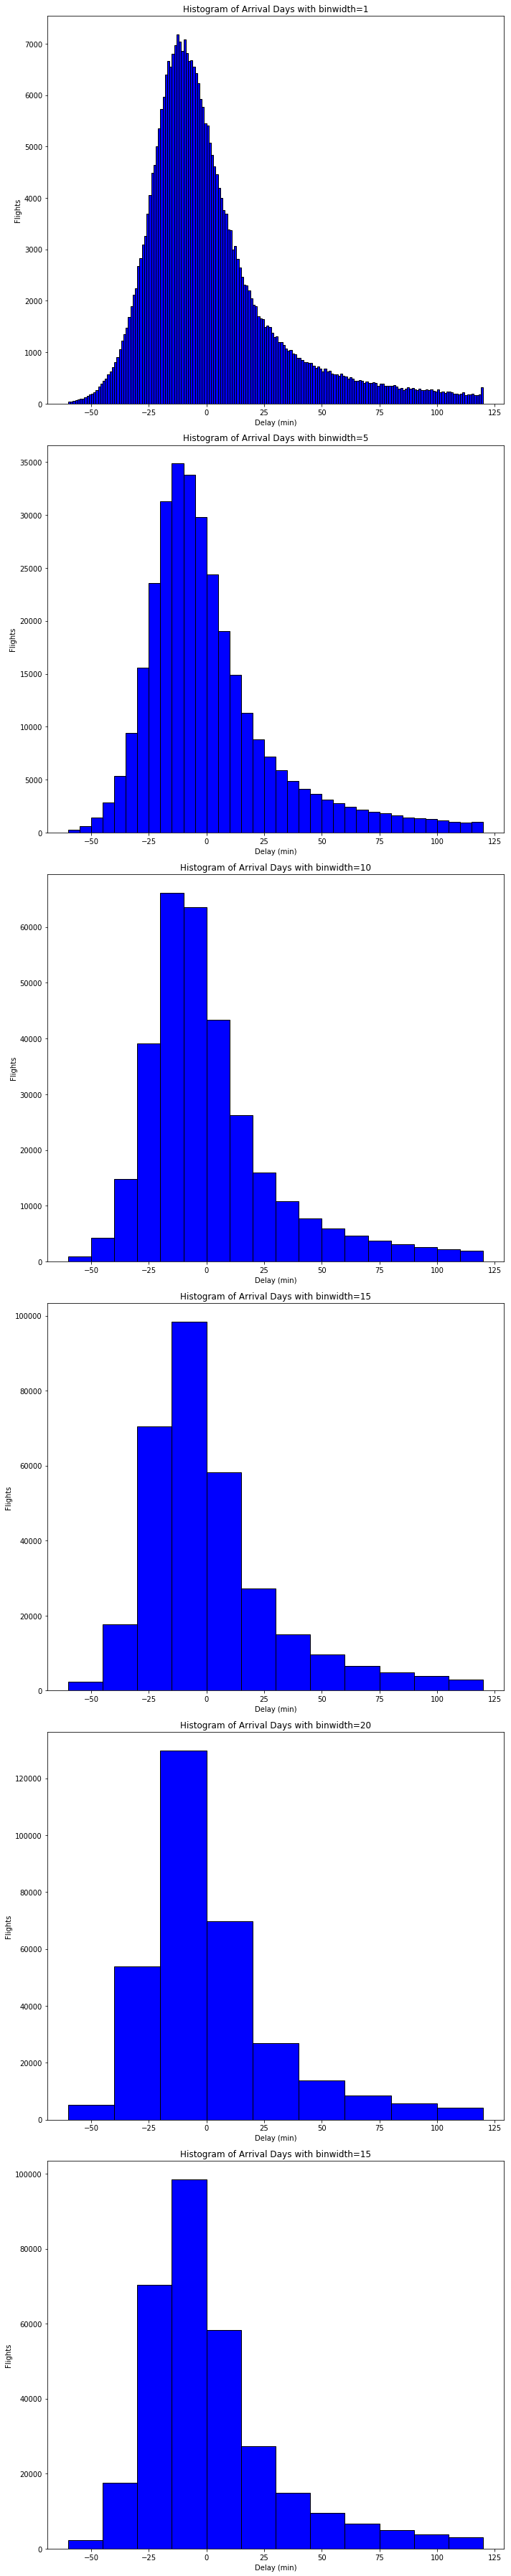

In [13]:
#trying out different value of bin
plt.figure(figsize=(10,50))
for i,binwidth in enumerate([1,5,10,15,20,15]):
    ax=plt.subplot(6,1,i+1)
    
    ax.hist(data['arr_delay'],color='blue',edgecolor='black',bins=int(180/binwidth))
    ax.set_title('Histogram of Arrival Days with binwidth=%d' % binwidth)
    ax.set_xlabel('Delay (min)')
    ax.set_ylabel('Flights')
plt.tight_layout()
plt.show()

In [14]:
x1=list(data[data['name']=='United Air Lines Inc.']['arr_delay'])
x2=list(data[data['name']=='JetBlue Airways']['arr_delay'])
x3=list(data[data['name']=='ExpressJet Airlines Inc.']['arr_delay'])
x4=list(data[data['name']=='Delta Air Lines Inc.']['arr_delay'])
x5=list(data[data['name']=='American Airlines Inc.']['arr_delay'])

# Assign colors for each airline and the names
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']
names = ['United Air Lines Inc.', 'JetBlue Airways', 'ExpressJet Airlines Inc.',
         'Delta Air Lines Inc.', 'American Airlines Inc.']

c:\users\asus\anaconda3\envs\tf_gpu\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 1.0, 'Side-by-Side Histogram with Multiple Airlines')

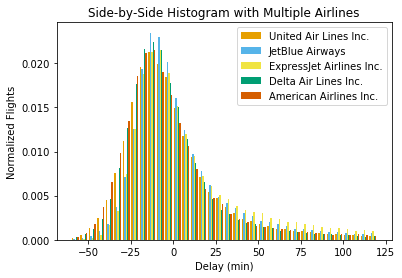

In [15]:
plt.hist([x1,x2,x3,x4,x5],bins=int(180/5),color=colors,normed=True,label=names)
# Plot formatting
plt.legend()
plt.xlabel('Delay (min)')
plt.ylabel('Normalized Flights')
plt.title('Side-by-Side Histogram with Multiple Airlines')

([array([0.00017083, 0.00116771, 0.00370547, 0.00476932, 0.00287629,
         0.00138281, 0.00072901, 0.00044126, 0.00027838, 0.00020857,
         0.00015579, 0.00010755]),
  array([0.00023071, 0.0016487 , 0.00660049, 0.00970267, 0.00570491,
         0.0027801 , 0.00152895, 0.0009407 , 0.00061805, 0.00046169,
         0.0003462 , 0.00026164]),
  array([0.00024915, 0.00202385, 0.00927559, 0.01396092, 0.00822649,
         0.00405252, 0.00234649, 0.00154172, 0.00106158, 0.00080392,
         0.00061266, 0.00047276]),
  array([0.00038905, 0.00302385, 0.01269644, 0.01803103, 0.01054121,
         0.00500826, 0.00281074, 0.00184167, 0.00125143, 0.00094183,
         0.0007256 , 0.00055278]),
  array([0.00051816, 0.00391319, 0.01505031, 0.02054609, 0.01195296,
         0.0056544 , 0.00312885, 0.00203719, 0.00139359, 0.00104314,
         0.00080591, 0.00062288])],
 array([-60., -45., -30., -15.,   0.,  15.,  30.,  45.,  60.,  75.,  90.,
        105., 120.]),
 <a list of 5 Lists of Patches objects

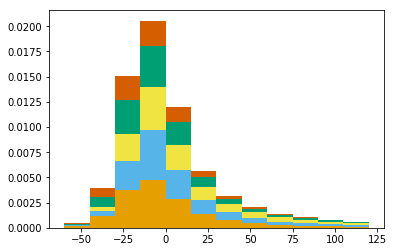

In [16]:
# Stacked histogram with multiple airlines
plt.hist([x1, x2, x3, x4, x5], bins = int(180/15), stacked=True,
         normed=True, color = colors, label=names)

 # Both these plots are not useful because data is too much cluttered into each other

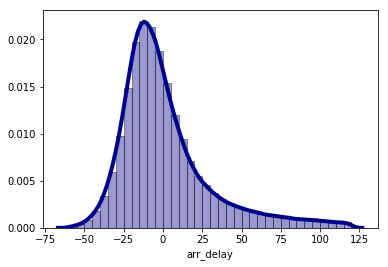

In [17]:
# Density Plot and Histogram of all arrival delays
sns.distplot(data['arr_delay'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [18]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

Text(0, 0.5, 'Density')

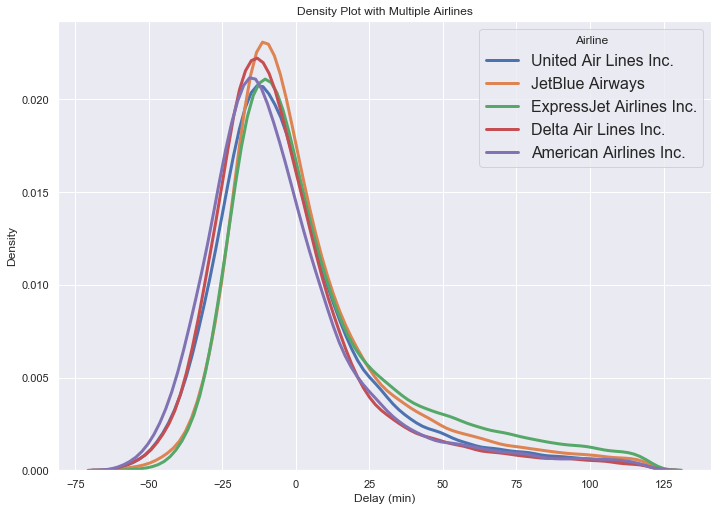

In [19]:
names = ['United Air Lines Inc.', 'JetBlue Airways', 'ExpressJet Airlines Inc.','Delta Air Lines Inc.', 'American Airlines Inc.']

for airline in names:
    subset=data[data['name']==airline]
    
    sns.distplot(subset['arr_delay'],hist=False,kde=True,bins=int(180/5),kde_kws={'linewidth':3},label=airline)
plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')    

Text(0, 0.5, 'Density')

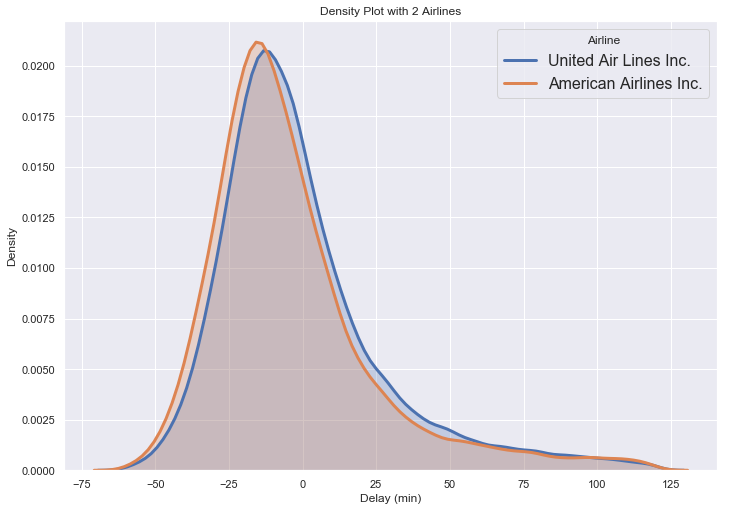

In [20]:
names = ['United Air Lines Inc.','American Airlines Inc.']

for airline in names:
    subset=data[data['name']==airline]
    
    sns.distplot(subset['arr_delay'],hist=False,kde=True,bins=int(180/5),kde_kws={'linewidth':3,'shade':True},label=airline)
plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Density Plot with 2 Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')    

Text(0, 0.5, 'Density')

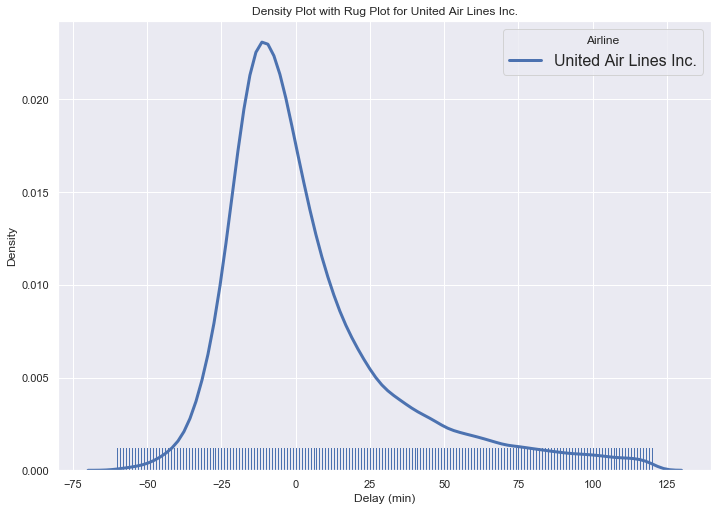

In [21]:
names = ['United Air Lines Inc.', 'JetBlue Airways', 'ExpressJet Airlines Inc.','Delta Air Lines Inc.', 'American Airlines Inc.']
subset=data[data['name']=='JetBlue Airways']
    
sns.distplot(subset['arr_delay'],hist=False,kde=True,rug=True,bins=int(180/5),kde_kws={'linewidth':3},label='United Air Lines Inc.')
plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Density Plot with Rug Plot for United Air Lines Inc.')
plt.xlabel('Delay (min)')
plt.ylabel('Density')    

In [22]:
names=list(data['name'].unique())

In [23]:
names

['United Air Lines Inc.',
 'American Airlines Inc.',
 'JetBlue Airways',
 'Delta Air Lines Inc.',
 'ExpressJet Airlines Inc.',
 'Envoy Air',
 'US Airways Inc.',
 'Southwest Airlines Co.',
 'Virgin America',
 'AirTran Airways Corporation',
 'Alaska Airlines Inc.',
 'Endeavor Air Inc.',
 'Frontier Airlines Inc.',
 'Hawaiian Airlines Inc.',
 'Mesa Airlines Inc.',
 'SkyWest Airlines Inc.']

16


Text(0, 0.5, 'Density')

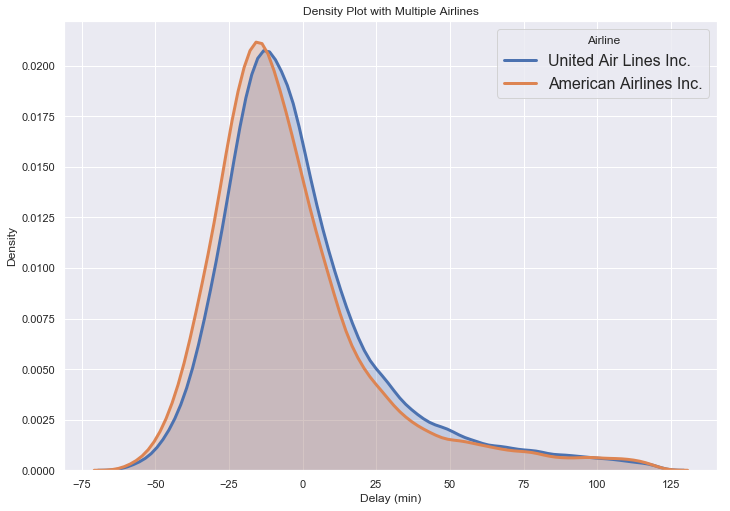

In [24]:
# names = ['United Air Lines Inc.', 'JetBlue Airways', 'ExpressJet Airlines Inc.','Delta Air Lines Inc.', 'American Airlines Inc.']
print(len(names))
for airline in names[0:2]:
    subset=data[data['name']==airline]
    
    sns.distplot(subset['arr_delay'],hist=False,kde=True,bins=int(180/5),kde_kws={'linewidth':3,'shade':True},label=airline)
plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')    

Text(0, 0.5, 'Density')

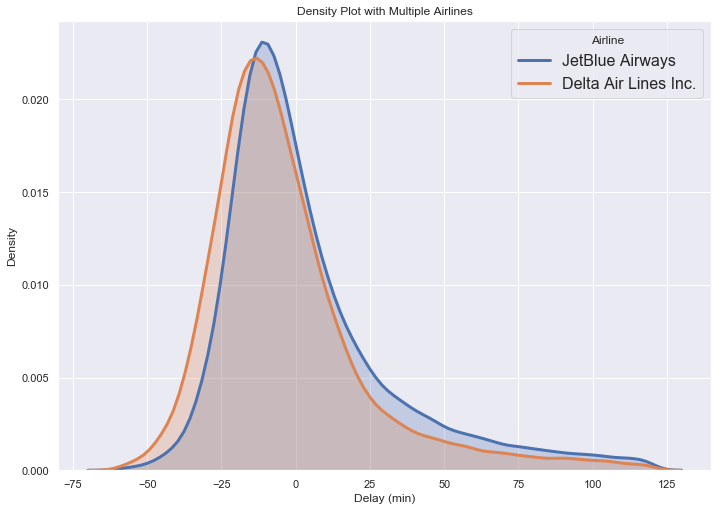

In [25]:
for airline in names[2:4]:
    subset=data[data['name']==airline]
    
    sns.distplot(subset['arr_delay'],hist=False,kde=True,bins=int(180/5),kde_kws={'linewidth':3,'shade':True},label=airline)
plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')    

Text(0, 0.5, 'Density')

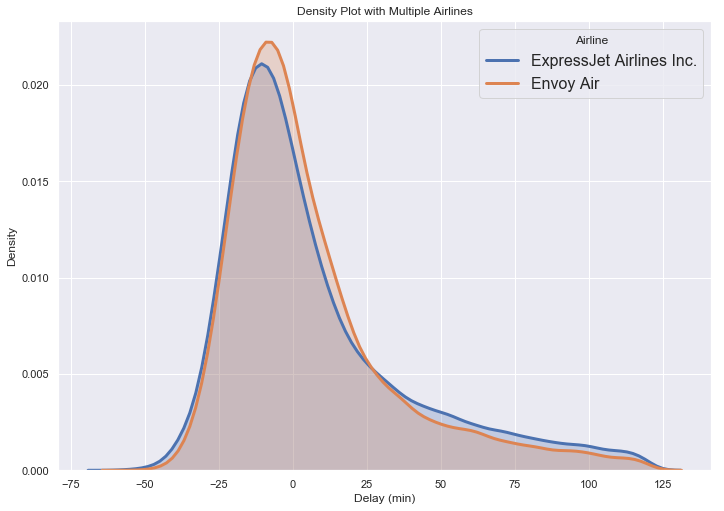

In [26]:
for airline in names[4:6]:
    subset=data[data['name']==airline]
    
    sns.distplot(subset['arr_delay'],hist=False,kde=True,bins=int(180/5),kde_kws={'linewidth':3,'shade':True},label=airline)
plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')    

Text(0, 0.5, 'Density')

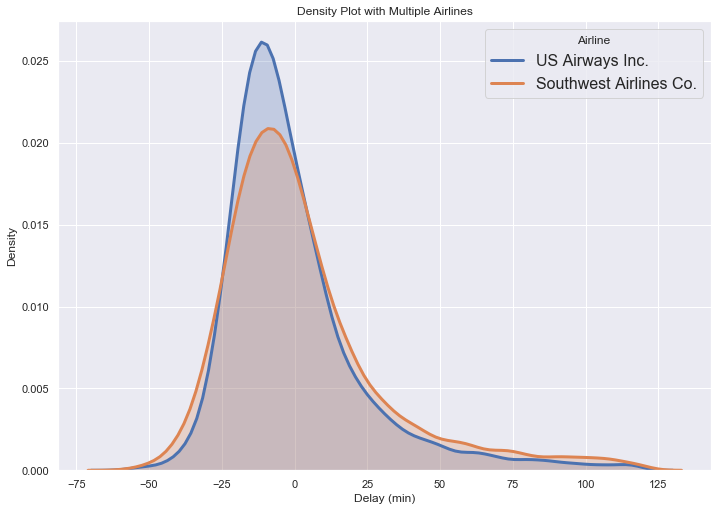

In [27]:
for airline in names[6:8]:
    subset=data[data['name']==airline]
    
    sns.distplot(subset['arr_delay'],hist=False,kde=True,bins=int(180/5),kde_kws={'linewidth':3,'shade':True},label=airline)
plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')    

Text(0, 0.5, 'Density')

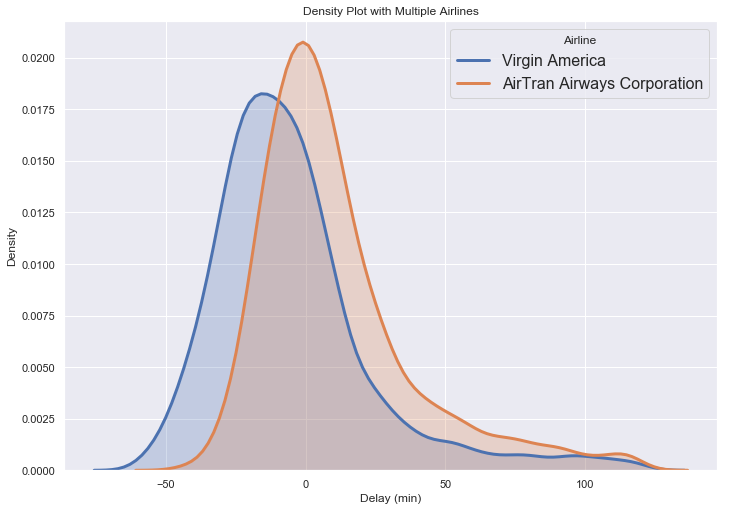

In [28]:
for airline in names[8:10]:
    subset=data[data['name']==airline]
    
    sns.distplot(subset['arr_delay'],hist=False,kde=True,bins=int(180/5),kde_kws={'linewidth':3,'shade':True},label=airline)
plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')    

Text(0, 0.5, 'Density')

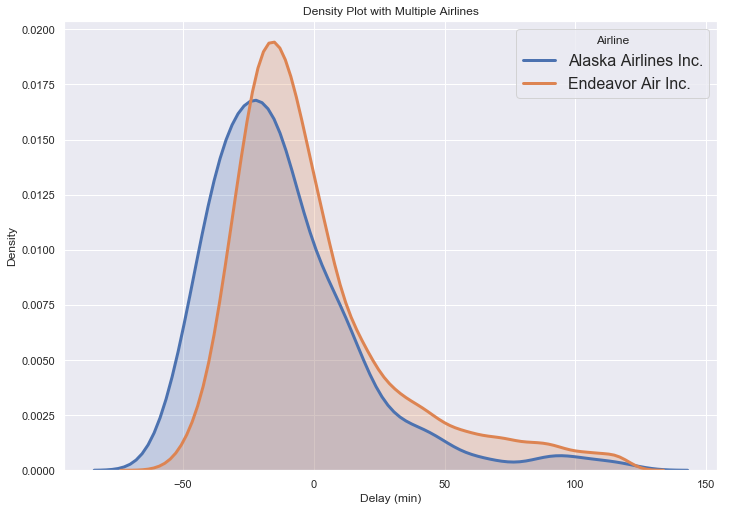

In [29]:
for airline in names[10:12]:
    subset=data[data['name']==airline]
    
    sns.distplot(subset['arr_delay'],hist=False,kde=True,bins=int(180/5),kde_kws={'linewidth':3,'shade':True},label=airline)
plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')    

Text(0, 0.5, 'Density')

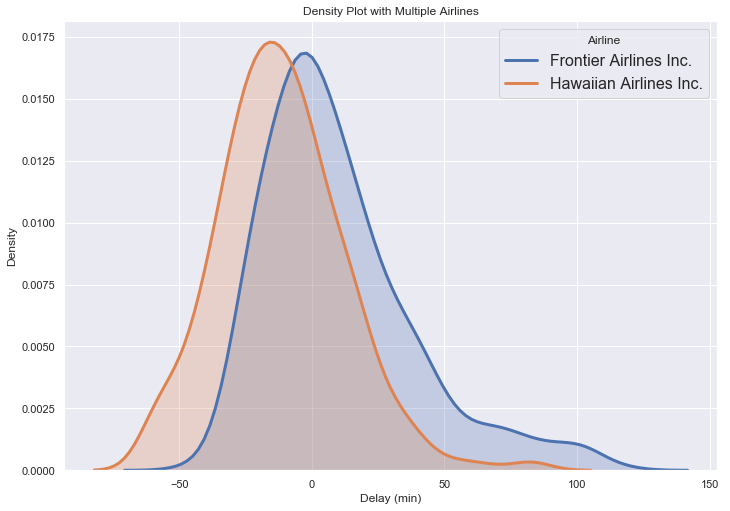

In [30]:
for airline in names[12:14]:
    subset=data[data['name']==airline]
    
    sns.distplot(subset['arr_delay'],hist=False,kde=True,bins=int(180/5),kde_kws={'linewidth':3,'shade':True},label=airline)
plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')    

Text(0, 0.5, 'Density')

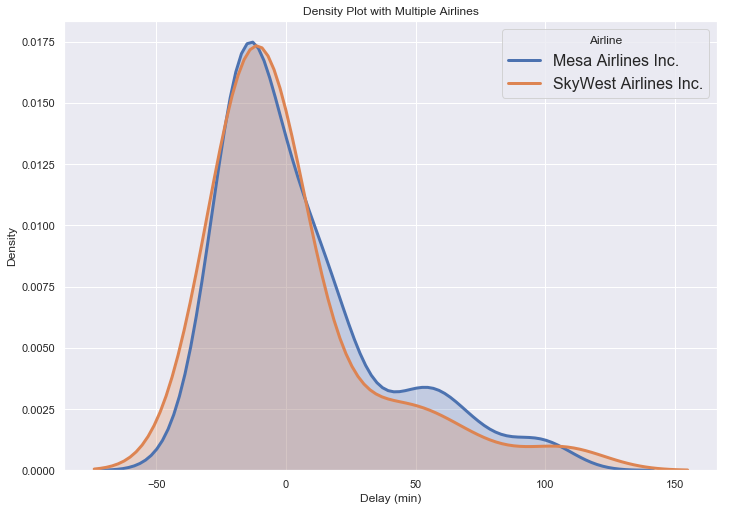

In [31]:
for airline in names[14:16]:
    subset=data[data['name']==airline]
    
    sns.distplot(subset['arr_delay'],hist=False,kde=True,bins=int(180/5),kde_kws={'linewidth':3,'shade':True},label=airline)
plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')    

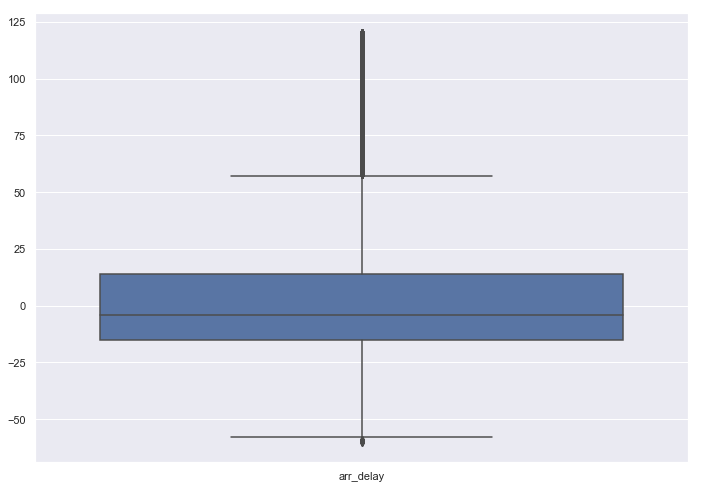

In [35]:
subset=data[data['name']=='JetBlue Airways']
sns.boxplot(data=subset)

In [36]:
names

['United Air Lines Inc.',
 'American Airlines Inc.',
 'JetBlue Airways',
 'Delta Air Lines Inc.',
 'ExpressJet Airlines Inc.',
 'Envoy Air',
 'US Airways Inc.',
 'Southwest Airlines Co.',
 'Virgin America',
 'AirTran Airways Corporation',
 'Alaska Airlines Inc.',
 'Endeavor Air Inc.',
 'Frontier Airlines Inc.',
 'Hawaiian Airlines Inc.',
 'Mesa Airlines Inc.',
 'SkyWest Airlines Inc.']

In [37]:
new_names=['American Airlines Inc.','Delta Air Lines Inc.','Envoy Air','US Airways Inc.','Virgin America','Alaska Airlines Inc.','Hawaiian Airlines Inc.','SkyWest Airlines Inc.']

Text(0, 0.5, 'Density')

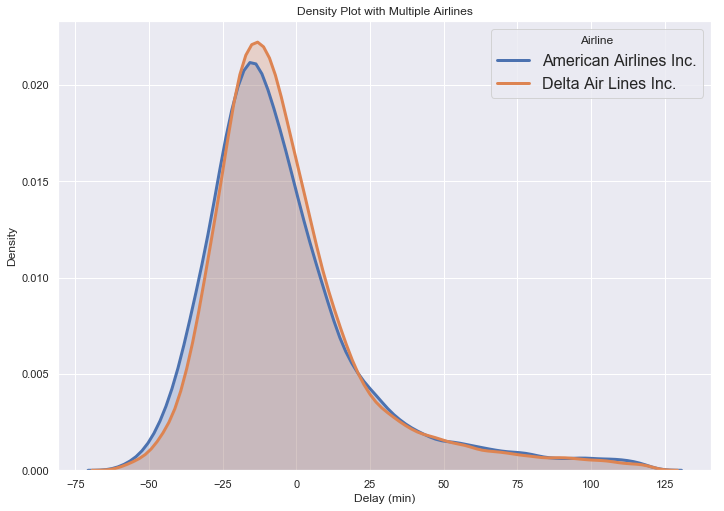

In [38]:
for airline in new_names[0:2]:
    subset=data[data['name']==airline]
    
    sns.distplot(subset['arr_delay'],hist=False,kde=True,bins=int(180/5),kde_kws={'linewidth':3,'shade':True},label=airline)
plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')    

Text(0, 0.5, 'Density')

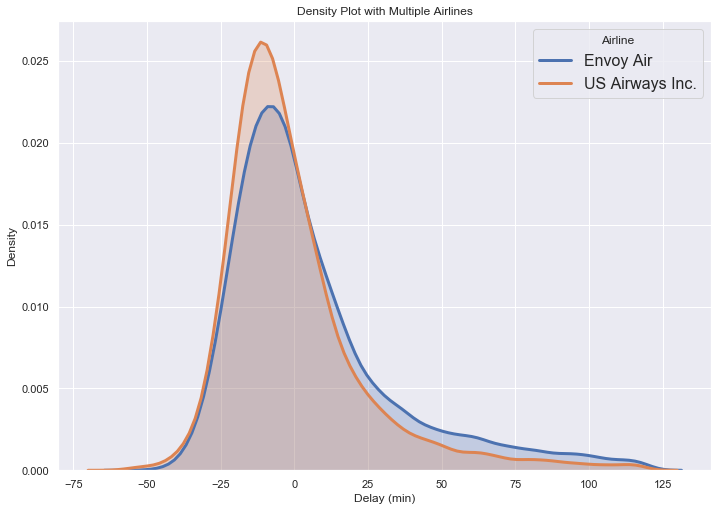

In [39]:
for airline in new_names[2:4]:
    subset=data[data['name']==airline]
    
    sns.distplot(subset['arr_delay'],hist=False,kde=True,bins=int(180/5),kde_kws={'linewidth':3,'shade':True},label=airline)
plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')    

Text(0, 0.5, 'Density')

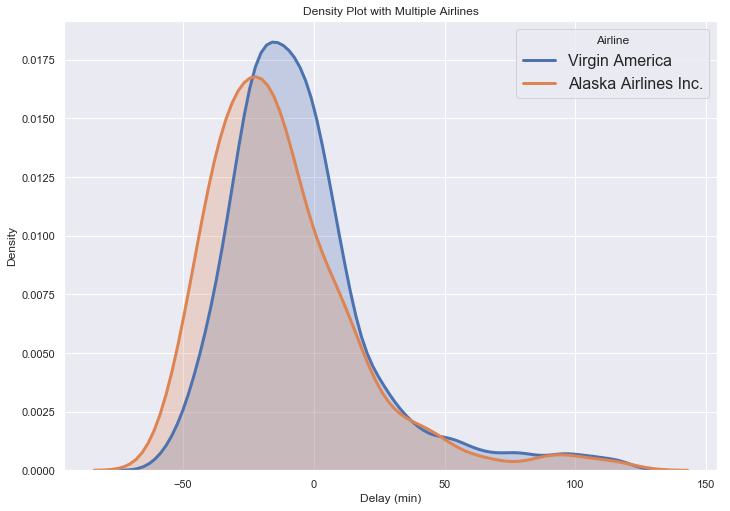

In [40]:
for airline in new_names[4:6]:
    subset=data[data['name']==airline]
    
    sns.distplot(subset['arr_delay'],hist=False,kde=True,bins=int(180/5),kde_kws={'linewidth':3,'shade':True},label=airline)
plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')    

Text(0, 0.5, 'Density')

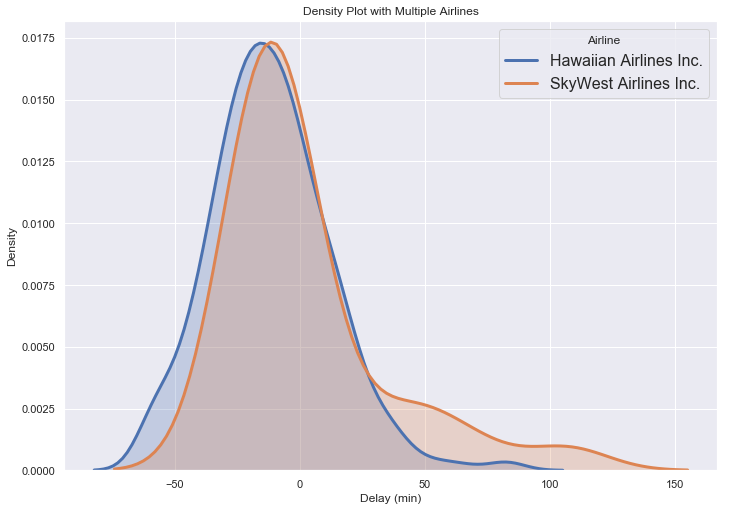

In [41]:
for airline in new_names[6:8]:
    subset=data[data['name']==airline]
    
    sns.distplot(subset['arr_delay'],hist=False,kde=True,bins=int(180/5),kde_kws={'linewidth':3,'shade':True},label=airline)
plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')    

In [42]:
new_names

['American Airlines Inc.',
 'Delta Air Lines Inc.',
 'Envoy Air',
 'US Airways Inc.',
 'Virgin America',
 'Alaska Airlines Inc.',
 'Hawaiian Airlines Inc.',
 'SkyWest Airlines Inc.']

In [43]:
nname=['American Airlines Inc.','US Airways Inc.','Alaska Airlines Inc.','Hawaiian Airlines Inc.']

Text(0, 0.5, 'Density')

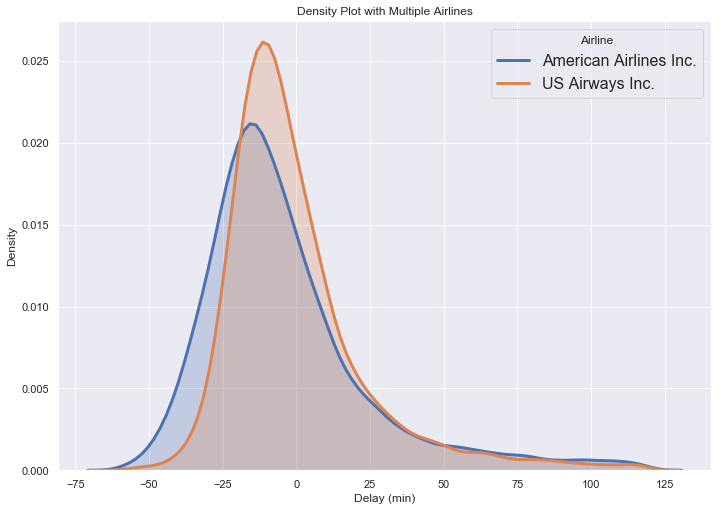

In [44]:
for airline in nname[0:2]:
    subset=data[data['name']==airline]
    
    sns.distplot(subset['arr_delay'],hist=False,kde=True,bins=int(180/5),kde_kws={'linewidth':3,'shade':True},label=airline)
plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')    

Text(0, 0.5, 'Density')

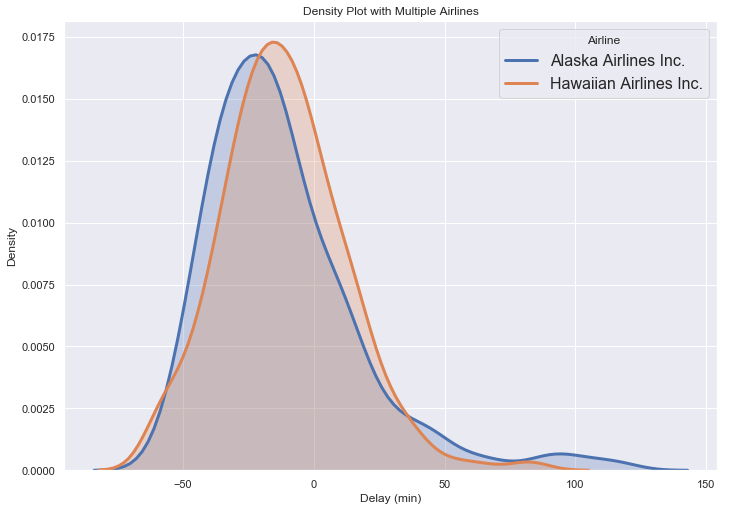

In [45]:
for airline in nname[2:4]:
    subset=data[data['name']==airline]
    
    sns.distplot(subset['arr_delay'],hist=False,kde=True,bins=int(180/5),kde_kws={'linewidth':3,'shade':True},label=airline)
plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')    

In [46]:
nname

['American Airlines Inc.',
 'US Airways Inc.',
 'Alaska Airlines Inc.',
 'Hawaiian Airlines Inc.']

In [47]:
nnames=['American Airlines Inc.','Alaska Airlines Inc.']

Text(0, 0.5, 'Density')

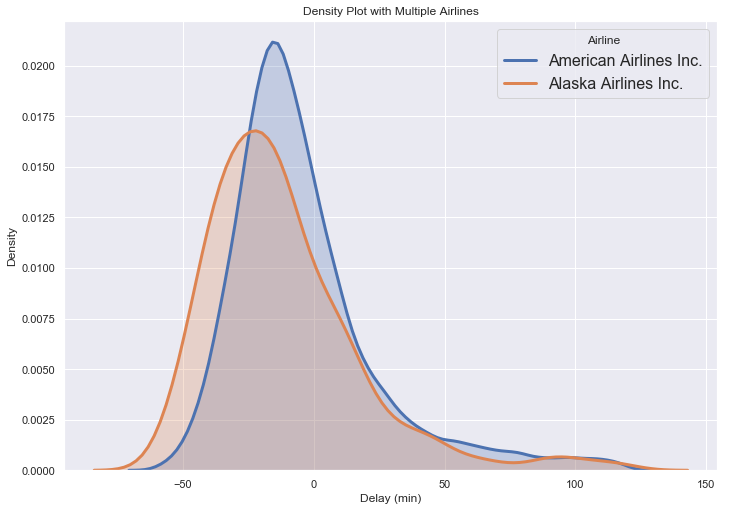

In [48]:
for airline in nnames:
    subset=data[data['name']==airline]
    
    sns.distplot(subset['arr_delay'],hist=False,kde=True,bins=int(180/5),kde_kws={'linewidth':3,'shade':True},label=airline)
plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')    

 #  ANS-Better option for airline is Alasks Airlines Inc.

 # Demonstrating Central Limit Theorem

In [6]:
delay_data=data['arr_delay']

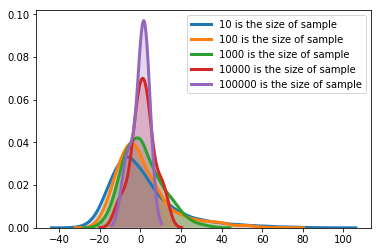

In [7]:
sample_size=[10,100,1000,10000,100000]

# print(len(delay_data))
for samples in sample_size:
    avg=[]
    for i in range(0,len(delay_data),samples):
        a=delay_data[i:i+samples]
    #     print(a)
        avg.append(np.average(a))
    sns.distplot(avg,hist=False,kde=True,kde_kws={'linewidth':3,'shade':True},label='{} is the size of sample'.format(samples))
    

In [8]:
n=1000
sample_size=[10,100,1000,10000,100000]

# print(len(delay_data))
for samples in sample_size:
    avg=[]
    for i in range(n):
        a=random.sample(delay_data,samples)
    #     print(a)
        avg.append(np.average(a))
    sns.distplot(avg,hist=False,kde=True,kde_kws={'linewidth':3,'shade':True},label='{} is the size of sample'.format(samples))
    

TypeError: Population must be a sequence or set.  For dicts, use list(d).

In [9]:
delay_data.sample(3)

289657   -23.0
172788    70.0
136       15.0
Name: arr_delay, dtype: float64

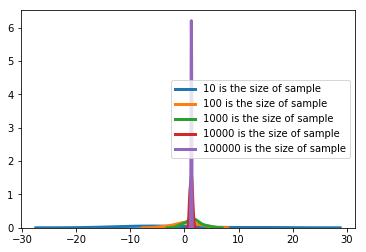

In [12]:
n=1000
sample_size=[10,100,1000,10000,100000]

# print(len(delay_data))
for samples in sample_size:
    avg=[]
    for i in range(10):
        a=delay_data.sample(samples)
#         print(a)
        avg.append(np.average(a))
    sns.distplot(avg,hist=False,kde=True,kde_kws={'linewidth':3,'shade':True},label='{} is the size of sample'.format(samples))
#     print(avg)